# Assignment 2 Computer Vision

I Putu Krisna Dharma Saputra/2301924353

In [1]:
# Import Library

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.fftpack
from scipy.signal import butter,filtfilt,iirnotch,lfilter

Show Grayscaled Image and Load Image

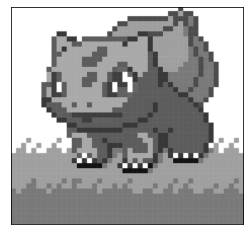

In [2]:
img = cv.imread('Bulba.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

plt.imshow(img_gray,cmap='gray')
plt.yticks([])
plt.xticks([])
plt.show()

Fourier Spectrum of Image using Grayscaled Image

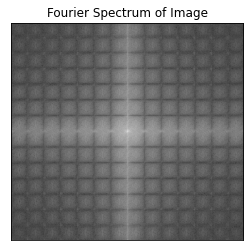

In [3]:
filter = np.fft.fft2(img_gray)
filter_shift = np.fft.fftshift(filter)
magnitude_spectrum = 20*np.log(np.abs(filter_shift))

plt.imshow(magnitude_spectrum,cmap='gray')
plt.title('Fourier Spectrum of Image')
plt.xticks([])
plt.yticks([])
plt.show()

Apply Low Pass Gaussian Blur On Grayscaled Image

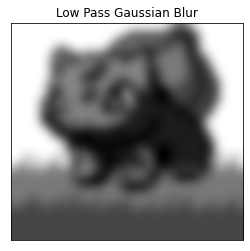

In [4]:
# kernel = np.ones((5,5),np.float32)/25
# conv = cv2.filter2D
Gauss_blur = cv.GaussianBlur(img_gray,(101,101),0)
plt.imshow(Gauss_blur,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Low Pass Gaussian Blur')
plt.show()

Spectrum After Low Pass Gaussian Blur

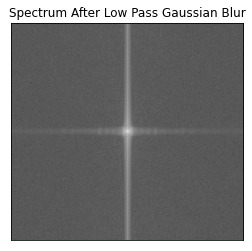

In [5]:
filter = np.fft.fft2(Gauss_blur)
filter_shift = np.fft.fftshift(filter)
magnitude_spectrum = 20*np.log(np.abs(filter_shift))
plt.imshow(magnitude_spectrum,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Spectrum After Low Pass Gaussian Blur')
plt.show() 

Apply High Pass Gaussian Blur On Grayscaled Image

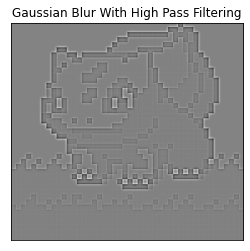

In [6]:
highpass = img_gray - cv.GaussianBlur(img_gray,(101,101),3)+127
plt.title('Gaussian Blur With High Pass Filtering')
plt.xticks([])
plt.yticks([])
plt.imshow(highpass,cmap='gray')
plt.show()

Apply Spectrum High Pass Gaussian Blur On Grayscaled Image

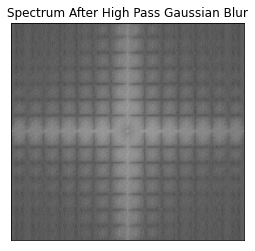

In [7]:
filter = np.fft.fft2(highpass)
filter_shift = np.fft.fftshift(filter)
magnitude_spectrum = 20*np.log(np.abs(filter_shift))
plt.imshow(magnitude_spectrum,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Spectrum After High Pass Gaussian Blur')
plt.show() 

Define Function for Butter Filter and apply 

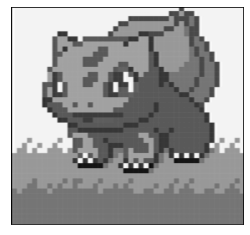

In [8]:
def butter_lowpass_filter(cutoff_freq,sampling_rate,order = 2):
  myqs = 0.5*sampling_rate
  normal_cutoff_freq = cutoff_freq/ myqs
  b,a = butter(order,normal_cutoff_freq,btype='low',analog=False)
  return b,a

def butter_highpass_filter(cutoff_freq,sampling_rate,order=2):
  myqs = 0.5*sampling_rate
  normal_cutoff_freq = cutoff_freq/myqs
  b,a = butter(order,normal_cutoff_freq,btype='high',analog=False)
  return b,a

def butter_bandpass_filter(lowcutoff,highcutoff,sampling_rate,order=2):
  myqs = 0.5*sampling_rate
  low_normal_cutoff = lowcutoff / myqs
  high_normal_cutoff = highcutoff/ myqs
  b,a = butter(order,[low_normal_cutoff, high_normal_cutoff],btype='band')
  return a,b

b,a = butter_lowpass_filter(10,100)
c = lfilter(b,a,img_gray)
plt.imshow(c,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()


Using Notch Filter

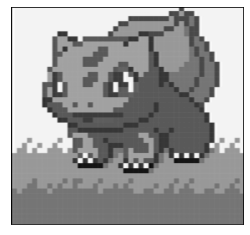

In [9]:
b,a = iirnotch(10,Q=0.005,fs=100)
c = lfilter(b,a,c)
plt.imshow(c,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()


Butter Filter in High Pass

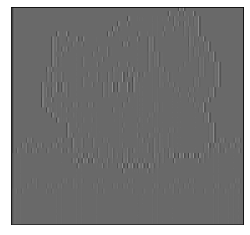

In [10]:
b,a = butter_highpass_filter(10,100)
c = lfilter(b,a,img_gray)
plt.imshow(c,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

Notch Filter in High Pass Butter Filter

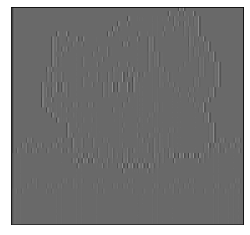

In [11]:
b,a = iirnotch(10,Q=0.005,fs=100)
c = lfilter(b,a,c)
plt.imshow(c,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()